In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
url="https://drive.google.com/file/d/1LO4i_-TkSmxnR0dgO5_lVLZ35FtGTNzA/view?usp=drive_link"
url="https://drive.google.com/uc?export=download&confirm=1&id=" + url.split("/")[-2]
total_db = pd.read_csv(url)
total_db.sample(5)

Unnamed: 0         Nom      Etat Code_Etat  id_Etat  id_county  \
362          362     Liberty   Florida        FL    27291      27698   
185          185       Union  Arkansas        AR      149        660   
2894        2894     Halifax  Virginia        VA    27330      30256   
835          835      Grundy      Iowa        IA    27297      28172   
367          367  Miami-Dade   Florida        FL    27291      32078   

            NAME                                           geometry     fips  \
362      Liberty  POLYGON ((-85.15381099999999 30.09284899999999...  12077.0   
185        Union  POLYGON ((-92.98848699999999 33.02681899999999...   5139.0   
2894     Halifax  POLYGON ((-79.21846 36.542377, -79.20907299999...  51083.0   
835       Grundy  POLYGON ((-93.026787 42.528791999999996, -93.0...  19075.0   
367   Miami-Dade  MULTIPOLYGON (((-80.176276 25.525053999999997,...  12086.0   

      unemp_rate_year_2013  unemp_rate_year_2014  unemp_rate_year_2015  \
362                    6.8                   5.9                   5.4   
185                    7.6                   6.5                   5.1   
2894                   8.1                   6.5                   5.6   
835                    4.1                   4.3                   4.0   
367                    6.8                   6.0                   5.5   

      unemp_rate_year_2016  unemp_rate_year_2017  unemp_rate_year_2018  \
362                    4.8                   4.1                   4.8   
185                    5.1                   5.1                   6.2   
2894                   5.4                   4.4                   5.0   
835                    3.6                   2.9                   3.9   
367                    5.0                   4.3                   4.2   

      med_h_income_year_2013  med_h_income_year_2014  med_h_income_year_2015  \
362                  36561.0                 38473.0                 39623.0   
185                  38132.0                 40841.0                 42195.0   
2894                 35553.0                 39079.0                 40432.0   
835                  61381.0                 61215.0                 62423.0   
367                  41840.0                 42754.0                 43687.0   

      med_h_income_year_2016  med_h_income_year_2017  med_h_income_year_2018  \
362                  38900.0                 41308.0                 40814.0   
185                  41546.0                 43827.0                 45335.0   
2894                 39859.0                 42552.0                 43096.0   
835                  64146.0                 72184.0                 65060.0   
367                  45886.0                 49758.0                 52043.0   

      resident_pop_year_2013  resident_pop_year_2014  resident_pop_year_2015  \
362                    8.360                   8.419                   8.412   
185                   40.619                  40.156                  40.112   
2894                  35.389                  35.205                  35.104   
835                   12.340                  12.388                  12.402   
367                 2609.570                2634.056                2659.549   

      resident_pop_year_2016  resident_pop_year_2017  resident_pop_year_2018  \
362                    8.307                   8.234                   8.421   
185                   39.920                  39.499                  39.130   
2894                  35.003                  34.592                  34.212   
835                   12.303                  12.296                  12.268   
367                 2689.890                2709.126                2709.711   

      snap_beneficiaries_year_2013  snap_beneficiaries_year_2014  \
362                         1459.0                        1466.0   
185                         8225.0                        7912.0   
2894                        6995.0                        6637.0   
835   

In [4]:
gun_violence_db = pd.read_csv('df_gun_violence.csv')
gun_violence_db.sample(5)

Unnamed: 0  incident_id        date    state  city_or_county  \
67957        66325       332555  2015-05-01     Ohio  North Royalton   
45738        44400       220432  2014-11-09  Alabama          Wilmer   
136909      135114       612015  2016-07-23    Texas            Waco   
42622        40829       210523  2014-10-20    Texas          Dallas   
143855      142033       643516  2016-08-30  Arizona          Tucson   

                        address  n_killed  n_injured  \
67957            14713 Ridge Rd         0          0   
45738   Georgetown Wilmer Road          0          1   
136909         901 East Johnson         0          2   
42622   2375 International Pkwy         0          0   
143855          5301 E Grant Rd         0          1   

                                             incident_url  \
67957   http://www.gunviolencearchive.org/incident/332555   
45738   http://www.gunviolencearchive.org/incident/220432   
136909  http://www.gunviolencearchive.org/incident/612015   
42622   http://www.gunviolencearchive.org/incident/210523   
143855  http://www.gunviolencearchive.org/incident/643516   

                                               source_url  \
67957   http://www.cleveland.com/metro/index.ssf/2015/...   
45738   http://fox10tv.com/2014/11/09/two-people-taken...   
136909  http://www.ksla.com/story/32523180/shooting-at...   
42622   http://blog.tsa.gov/2014/10/tsa-week-in-review...   
143855  http://www.tucsonnewsnow.com/story/32943204/po...   

        incident_url_fields_missing  congressional_district      gun_stolen  \
67957                         False                    16.0  {0: 'Unknown'}   
45738                         False                     1.0             NaN   
136909                        False                    17.0             NaN   
42622                         False                    24.0  {0: 'Unknown'}   
143855                        False                     2.0  {0: 'Unknown'}   

              gun_type                           incident_characteristics  \
67957   {0: 'Unknown'}  ['Non-Shooting Incident', 'School Incident', '...   
45738              NaN                                                NaN   
136909             NaN  ['Shot - Wounded/Injured', 'Bar/club incident ...   
42622   {0: 'Unknown'}                                                NaN   
143855  {0: 'Unknown'}  ['Shot - Wounded/Injured', 'LOCKDOWN/ALERT ONL...   

        latitude                location_description  longitude  \
67957    41.3110                                 NaN   -81.7333   
45738    30.8752                                 NaN   -88.3041   
136909   31.5840       TJ’s Wine, Dine and Soul Food   -97.1139   
42622    32.8982  Dallas/Ft Worth Intl Airport (DFW)   -97.0404   
143855   32.2529               Tucson Medical Center  -110.8810   

        n_guns_involved                                              notes  \
67957               1.0  North Royalton High School and Middle Father l...   
45738               NaN                                  Male shot wounded   
136909              NaN                                             2 inj.   
42622               1.0            Dallas/Fort Worth International Airport   
143855              1.0  parking garage, shot in car, fled on foot, bri...   

           participant_age             participant_age_group  \
67957                  NaN                               NaN   
45738                  NaN  {0: 'Adult 18+', 1: 'Adult 18+'}   
136909  {0: '51', 1: '25'}  {0: 'Adult 18+', 1: 'Adult 18+'}   
42622                  NaN                               NaN   
143855           {0: '25'}  {0: 'Adult 18+', 1: 'Adult 18+'}   

              participant_gender                   participant_name  \
67957                        NaN                                NaN   
45738     {0: 'Male', 1: 'Male'}                                NaN   
136909    {0: 'Male', 1: 'Male'}  0::Michael Perry||1::Joshua Moore   
42622                    

In [5]:
from shapely import wkt
def wkt_loads(x):
    try:
        return wkt.loads(x)
    except Exception:
        return None
total_db = total_db.dropna(subset=['geometry'])
total_db['geometry'] = total_db['geometry'].apply(wkt_loads)

In [6]:
total_db = total_db.loc[total_db['Etat'] != 'Alaska']
total_db = total_db.loc[total_db['Etat'] != 'Hawaii']

gun_violence_db = gun_violence_db.loc[gun_violence_db['state'] != 'Alaska']
gun_violence_db = gun_violence_db.loc[gun_violence_db['state'] != 'Hawaii']


In [7]:
total_db_geo = (
    gpd.GeoDataFrame(total_db)
    .set_geometry('geometry')
    .set_crs('EPSG:4269')
)

In [8]:
#changement de valeur pour Richmond, Virginia car valeur aberrante de 8.755 alors qu'il y avait 204 214	habitants en 2010
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2013'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2014'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2015'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2016'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2017'] = 204.214 
total_db_geo.loc[total_db_geo['id_county'] == 30306, 'resident_pop_year_2018'] = 204.214 

In [9]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(gun_violence_db['longitude'], gun_violence_db['latitude'])]
gun_violence_geo = gpd.GeoDataFrame(gun_violence_db, geometry=geometry, crs='EPSG:4326')

gun_violence_geo = gun_violence_geo.set_crs('EPSG:4326')
gun_violence_geo = gun_violence_geo[gun_violence_geo.geometry.x <= -50]

### Tentative de merge les deux GeoDataFrame

In [10]:
total_db_geo=total_db_geo.to_crs('EPSG:4326')

In [11]:

merge_geo = gpd.sjoin(gun_violence_geo, total_db_geo, predicate='within')




In [12]:
geom_county=total_db_geo[['id_county','geometry']]
geom_county

id_county                                           geometry
0         27336  POLYGON ((-86.92119 32.65754, -86.92035 32.658...
1         27337  POLYGON ((-88.02858 30.22676, -88.02399 30.230...
2         27338  POLYGON ((-85.74803 31.61918, -85.74543 31.618...
3         27339  POLYGON ((-87.42194 33.00338, -87.31854 33.006...
4         27340  POLYGON ((-86.96336 33.85822, -86.95967 33.857...
...         ...                                                ...
3245      30524  POLYGON ((-110.05438 42.01103, -110.05436 42.0...
3246      30525  POLYGON ((-111.05361 44.66627, -110.75077 44.6...
3247      30526  POLYGON ((-111.04662 41.15605, -111.04659 41.2...
3248      30527  POLYGON ((-108.55056 44.16846, -108.50652 44.1...
3249      30528  POLYGON ((-105.08078 43.96621, -105.07928 44.1...

[3204 rows x 2 columns]

In [13]:
merge_geo2=pd.merge(merge_geo, geom_county, on='id_county')

In [14]:
merge_geo2.head()

Unnamed: 0_left  incident_id        date         state  \
0           100178       461105  2013-01-01  Pennsylvania   
1           104811       481268  2013-10-21  Pennsylvania   
2              678        94128  2014-01-08  Pennsylvania   
3              801        94504  2014-01-08  Pennsylvania   
4             1324        95999  2014-01-10  Pennsylvania   

          city_or_county                                    address  n_killed  \
0             Mckeesport  1506 Versailles Avenue and Coursin Street         0   
1  Pittsburgh (Homewood)                 7200 block of Kelly Street         2   
2              Homestead           Steak ‘n Shake at The Waterfront         1   
3                Munhall                Waterfront Shopping Complex         1   
4             Pittsburgh                 2000 block of Fifth Avenue         0   

   n_injured                                       incident_url  \
0          4  http://www.gunviolencearchive.org/incident/461105   
1          5  http://www.gunviolencearchive.org/incident/481268   
2          0   http://www.gunviolencearchive.org/incident/94128   
3          0   http://www.gunviolencearchive.org/incident/94504   
4          1   http://www.gunviolencearchive.org/incident/95999   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.wtae.com/news/local/allegheny/two-p...   
2  http://pittsburgh.cbslocal.com/2014/01/22/u-s-...   
3  http://www.post-gazette.com/local/south/2014/0...   
4  /pittsburgh.cbslocal.com/2014/01/11/man-wounde...   

   incident_url_fields_missing  congressional_district gun_stolen gun_type  \
0                        False                    14.0        NaN      NaN   
1                        False                    14.0        NaN      NaN   
2                        False                    14.0        NaN      NaN   
3                        False                    14.0        NaN      NaN   
4                        False                    14.0        NaN      NaN   

                            incident_characteristics  latitude  \
0  ['Shot - Wounded/Injured', 'Mass Shooting (4+ ...   40.3467   
1  ['Shot - Wounded/Injured', 'Shot - Dead (murde...   40.4555   
2  ['Shot - Dead (murder, accidental, suicide)', ...   40.4059   
3  ['Shot - Dead (murder, accidental, suicide)', ...   40.3923   
4                                                NaN   40.4380   

   location_description  longitude  n_guns_involved  \
0                   NaN   -79.8559              NaN   
1  Diverse Banquet Hall   -79.8970              NaN   
2                   NaN   -79.9120              NaN   
3                   NaN   -79.9000              NaN   
4                   NaN   -79.9775              NaN   

                                               notes  \
0  Julian Sims under investigation: Four Shot and...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

               participant_age  \
0                    {0: '20'}   
1           {0: '21', 1: '27'}   
2  {0: '20', 1: '20', 2: '17'}   
3           {0: '20', 1: '17'}   
4                          NaN   

                               participant_age_group  \
0  {0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...   
1  {0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...   
2  {0: 'Adult 18+', 1: 'Adult 18+', 2: 'Teen 12-17'}   
3                  {0: 'Adult 18+', 1: 'Teen 12-17'}   
4                                   {0: 'Adult 18+'}   

                                  participant_gender  \
0     {0: 'Male', 1: 'Male', 3: 'Male', 4: 'Female'}   
1  {0: 'Female', 1: 'Male', 2: 'Female', 3: 'Fema...   
2                  {0: 'Male', 1: 'Male', 2: 'Male'}   
3                             {0: 'Male', 1: 'Male'}   
4                                        {0: 'Male'} 

In [15]:
merge_geo = merge_geo2.rename(columns={'geometry_x': 'point_geometry', 'geometry_y': 'polygon_geometry'})

In [16]:
merge_geo.head()

Unnamed: 0_left  incident_id        date         state  \
0           100178       461105  2013-01-01  Pennsylvania   
1           104811       481268  2013-10-21  Pennsylvania   
2              678        94128  2014-01-08  Pennsylvania   
3              801        94504  2014-01-08  Pennsylvania   
4             1324        95999  2014-01-10  Pennsylvania   

          city_or_county                                    address  n_killed  \
0             Mckeesport  1506 Versailles Avenue and Coursin Street         0   
1  Pittsburgh (Homewood)                 7200 block of Kelly Street         2   
2              Homestead           Steak ‘n Shake at The Waterfront         1   
3                Munhall                Waterfront Shopping Complex         1   
4             Pittsburgh                 2000 block of Fifth Avenue         0   

   n_injured                                       incident_url  \
0          4  http://www.gunviolencearchive.org/incident/461105   
1          5  http://www.gunviolencearchive.org/incident/481268   
2          0   http://www.gunviolencearchive.org/incident/94128   
3          0   http://www.gunviolencearchive.org/incident/94504   
4          1   http://www.gunviolencearchive.org/incident/95999   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.wtae.com/news/local/allegheny/two-p...   
2  http://pittsburgh.cbslocal.com/2014/01/22/u-s-...   
3  http://www.post-gazette.com/local/south/2014/0...   
4  /pittsburgh.cbslocal.com/2014/01/11/man-wounde...   

   incident_url_fields_missing  congressional_district gun_stolen gun_type  \
0                        False                    14.0        NaN      NaN   
1                        False                    14.0        NaN      NaN   
2                        False                    14.0        NaN      NaN   
3                        False                    14.0        NaN      NaN   
4                        False                    14.0        NaN      NaN   

                            incident_characteristics  latitude  \
0  ['Shot - Wounded/Injured', 'Mass Shooting (4+ ...   40.3467   
1  ['Shot - Wounded/Injured', 'Shot - Dead (murde...   40.4555   
2  ['Shot - Dead (murder, accidental, suicide)', ...   40.4059   
3  ['Shot - Dead (murder, accidental, suicide)', ...   40.3923   
4                                                NaN   40.4380   

   location_description  longitude  n_guns_involved  \
0                   NaN   -79.8559              NaN   
1  Diverse Banquet Hall   -79.8970              NaN   
2                   NaN   -79.9120              NaN   
3                   NaN   -79.9000              NaN   
4                   NaN   -79.9775              NaN   

                                               notes  \
0  Julian Sims under investigation: Four Shot and...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

               participant_age  \
0                    {0: '20'}   
1           {0: '21', 1: '27'}   
2  {0: '20', 1: '20', 2: '17'}   
3           {0: '20', 1: '17'}   
4                          NaN   

                               participant_age_group  \
0  {0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...   
1  {0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...   
2  {0: 'Adult 18+', 1: 'Adult 18+', 2: 'Teen 12-17'}   
3                  {0: 'Adult 18+', 1: 'Teen 12-17'}   
4                                   {0: 'Adult 18+'}   

                                  participant_gender  \
0     {0: 'Male', 1: 'Male', 3: 'Male', 4: 'Female'}   
1  {0: 'Female', 1: 'Male', 2: 'Female', 3: 'Fema...   
2                  {0: 'Male', 1: 'Male', 2: 'Male'}   
3                             {0: 'Male', 1: 'Male'}   
4                                        {0: 'Male'} 

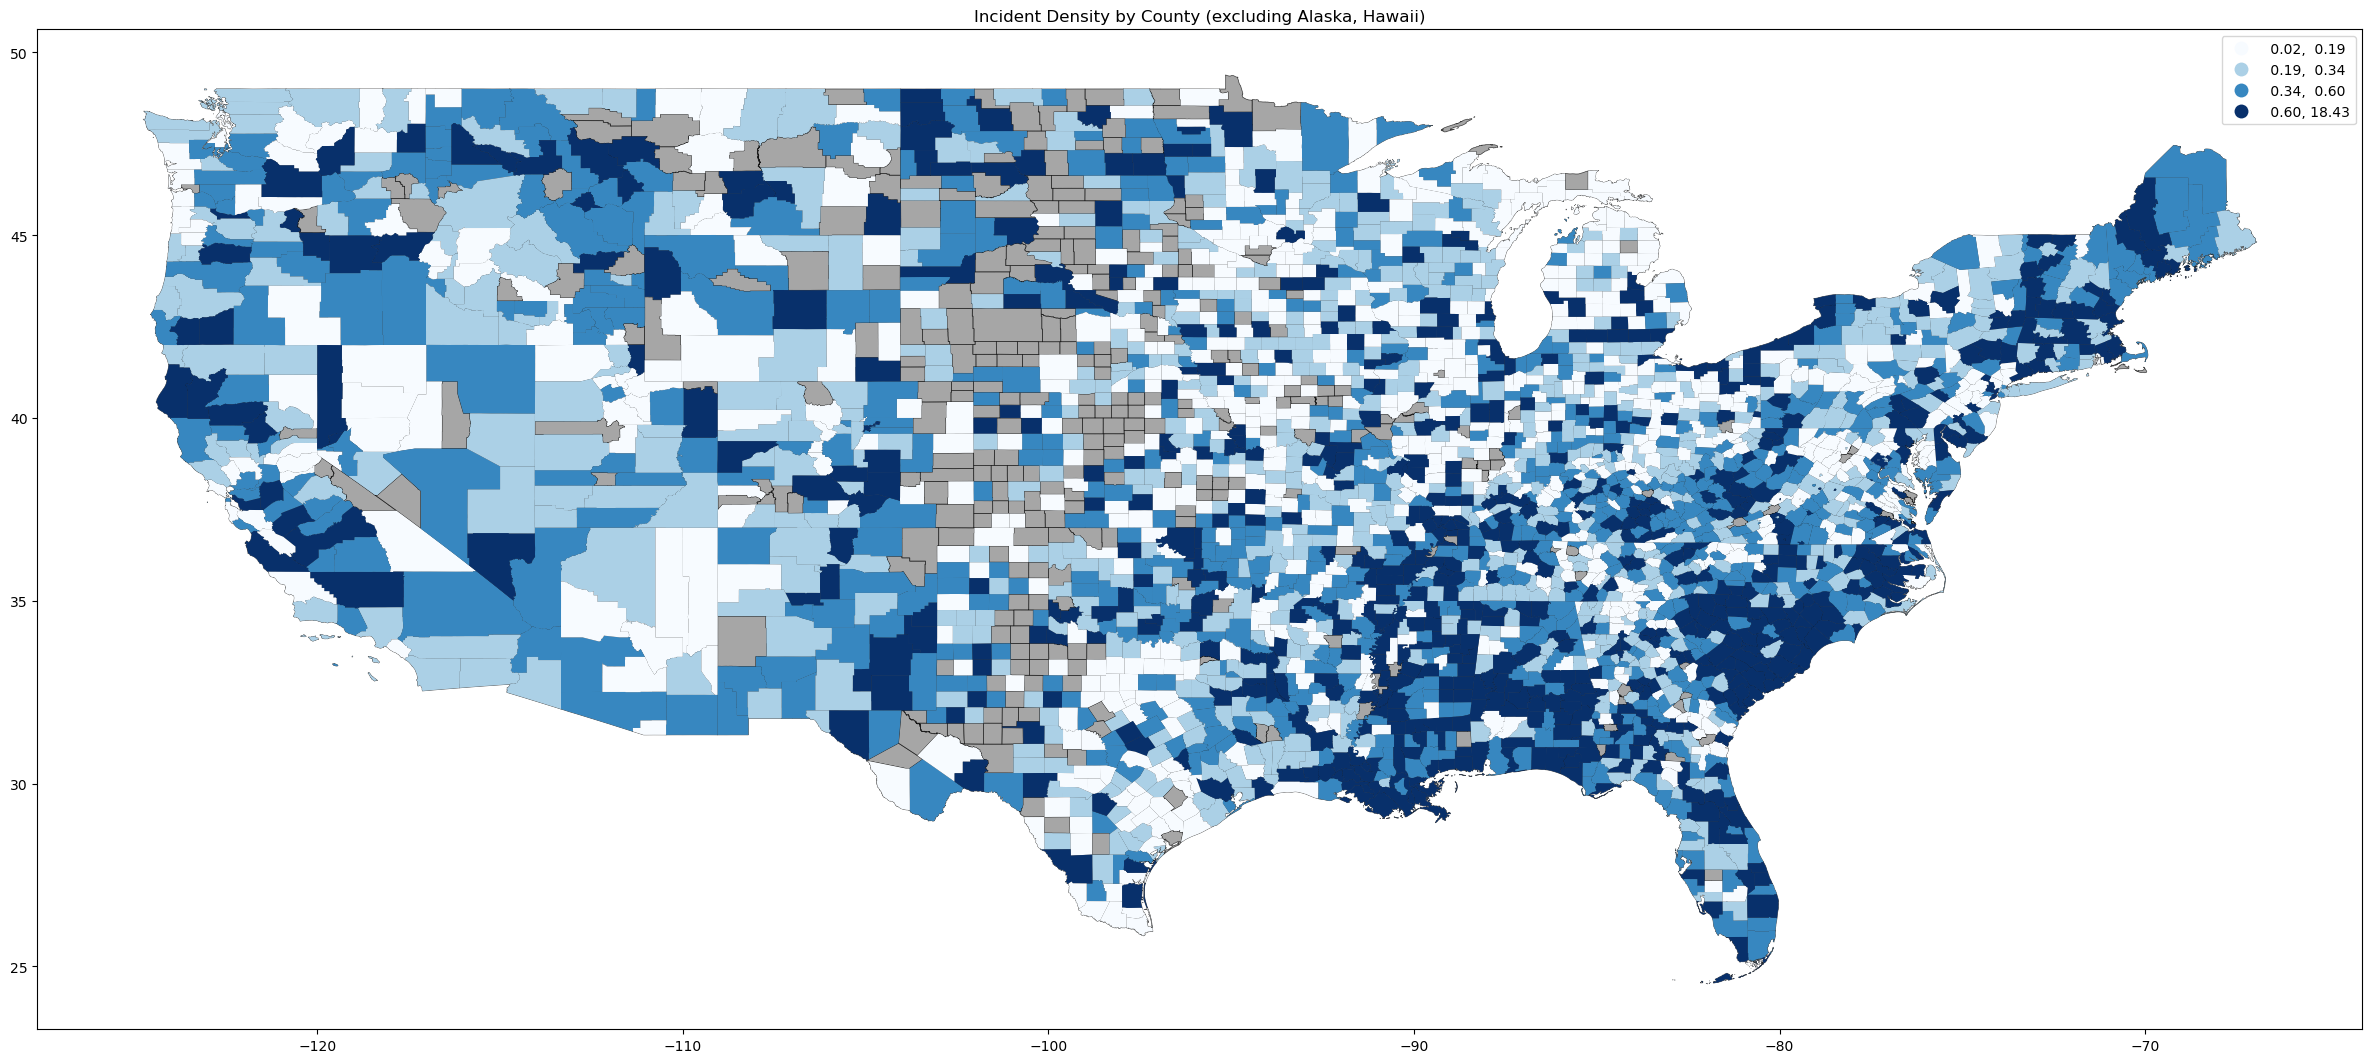

In [17]:

incident_count_by_county = merge_geo.groupby('id_county')['incident_id'].count().reset_index()

incident_pop_geo=pd.merge(incident_count_by_county,merge_geo, on='id_county', how='right')
incident_pop_geo.rename(columns={'incident_id_x':'incident_count_by_county'}, inplace=True)

agg_incident_county = incident_pop_geo.groupby('id_county').agg({'incident_count_by_county': 'first', 'resident_pop_year_2016': 'first'}).reset_index()
agg_incident_county['incident_density'] = agg_incident_county['incident_count_by_county'] / agg_incident_county['resident_pop_year_2016']


# Create a GeoDataFrame with the incident density
incident_density_geo = total_db_geo.merge(agg_incident_county, on='id_county', how='left')

# Base map plot
ax = total_db_geo.plot(
    color='gray',
    markersize=1,
    alpha=0.7,
    figsize=(30, 30),
    edgecolor='black',
    linewidth=0.5
)

# Additional data points plot using incident density
incident_density_geo.plot(ax=ax, aspect = 1, figsize = (10,6), column = "incident_density", legend = True, cmap = "Blues", 
scheme = "Quantiles", k = 4)

# Title and show plot
plt.title("Incident Density by County (excluding Alaska, Hawaii)")
plt.show()

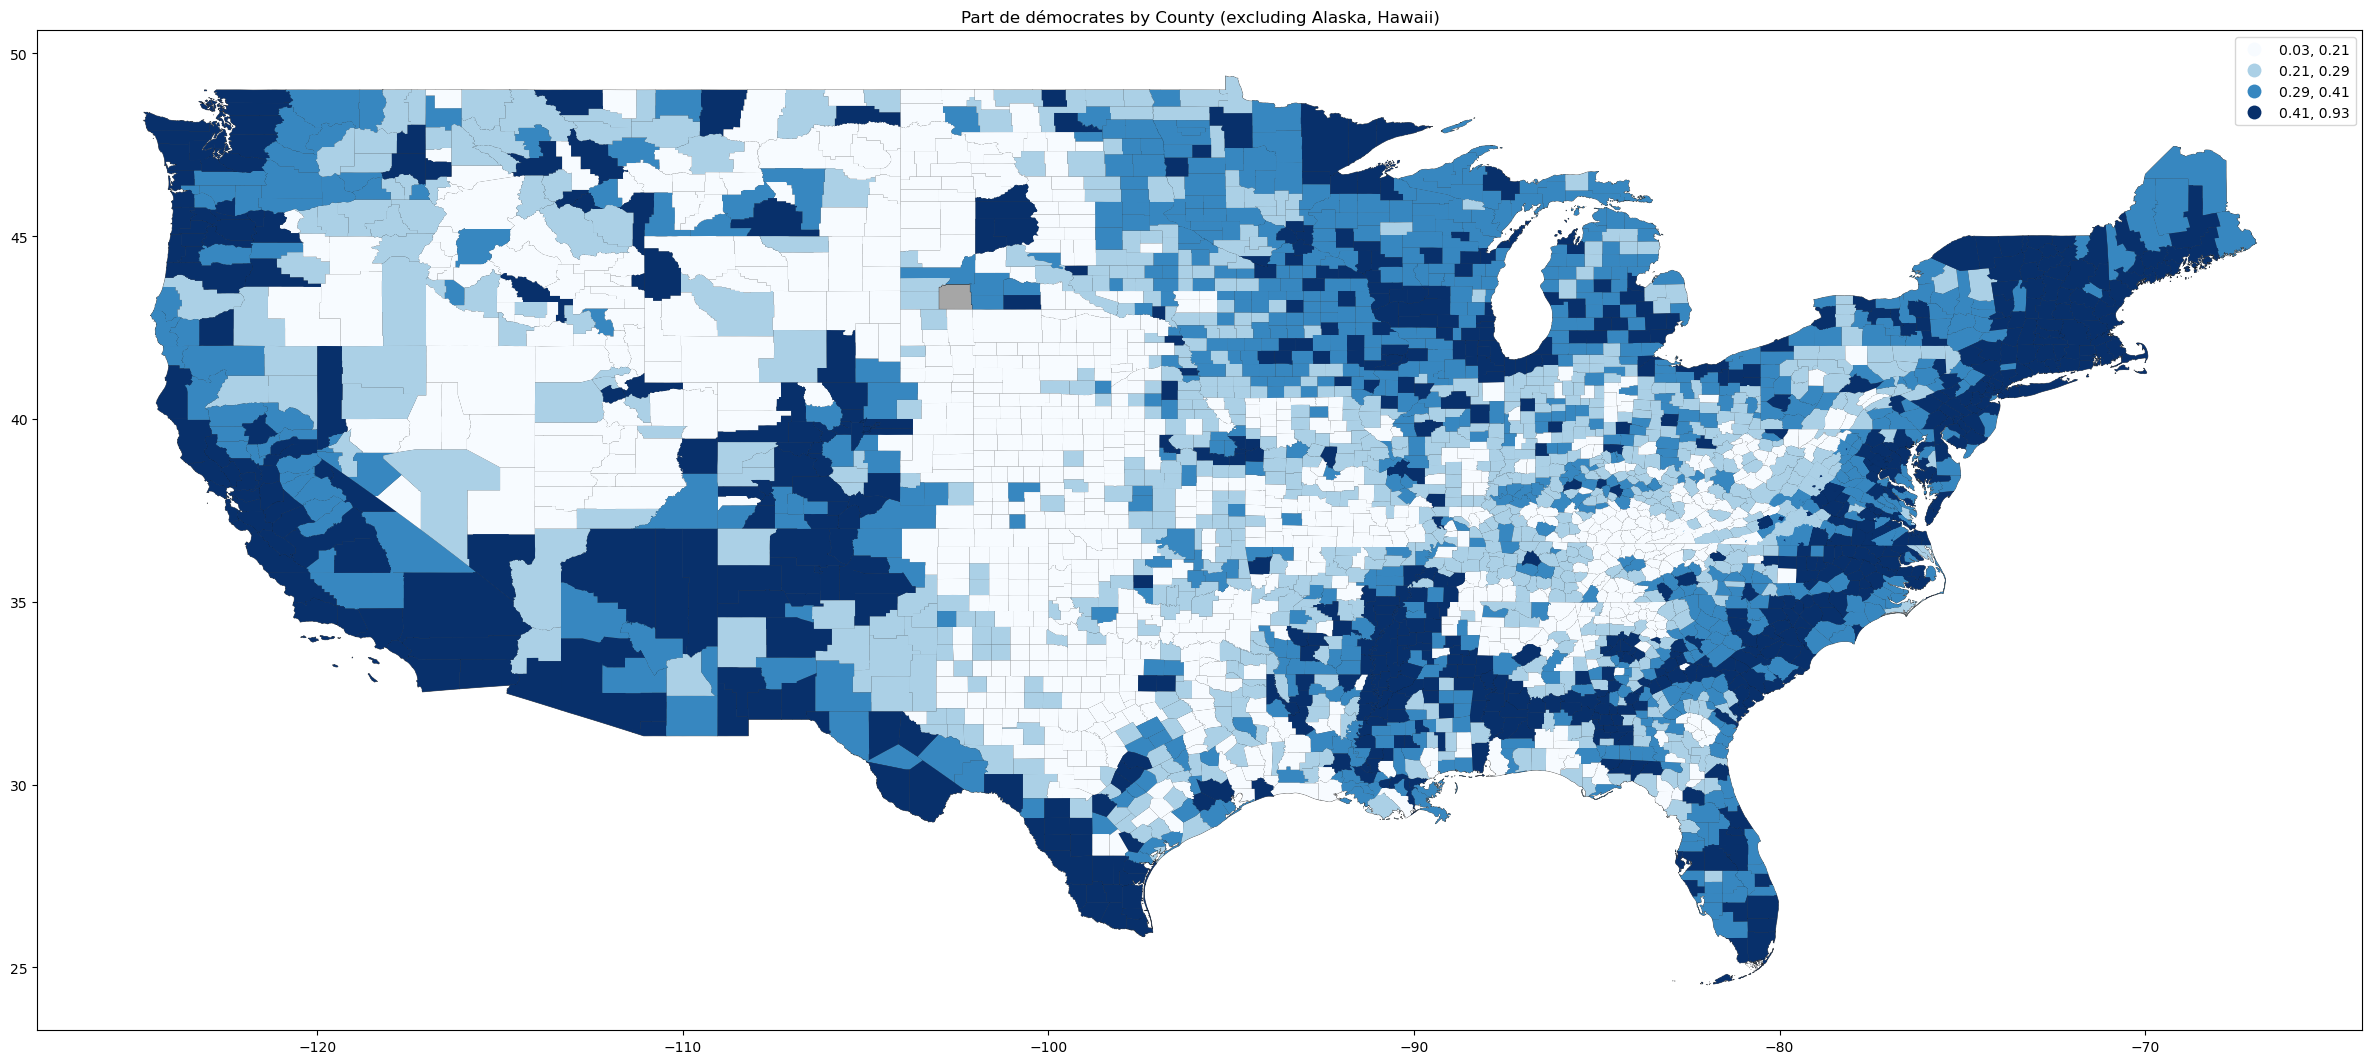

In [18]:
# Base map plot
ax = total_db_geo.plot(
    color='gray',
    markersize=1,
    alpha=0.7,
    figsize=(30, 30),
    edgecolor='black',
    linewidth=0.5
)

# Additional data points plot using incident density
incident_density_geo.plot(ax=ax, aspect = 1, figsize = (10,6), column = "per_dem", legend = True, cmap = "Blues", 
scheme = "Quantiles", k = 4)

# Title and show plot
plt.title("Part de démocrates by County (excluding Alaska, Hawaii)")
plt.show()

In [19]:
top_threshold = incident_density_geo['incident_density'].quantile(0.99)
bottom_threshold = incident_density_geo['incident_density'].quantile(0.05)

# Select rows with top 5% values
top_5_percent = incident_density_geo[incident_density_geo['incident_density'] > top_threshold]
top_5_percent.sort_values(by='incident_density', ascending=False)

# Select rows with bottom 5% values
#bottom_5_percent = df[df['density_incident'] < bottom_threshold]

Unnamed: 0                   Nom                  Etat Code_Etat  \
1554        1597             St. Louis              Missouri        MO   
1555        1598             St. Louis              Missouri        MO   
1163        1206             Baltimore              Maryland        MD   
1164        1207             Baltimore              Maryland        MD   
2830        2875               Fairfax              Virginia        VA   
2831        2876               Fairfax              Virginia        VA   
1162        1205             Baltimore              Maryland        MD   
1161        1204             Baltimore              Maryland        MD   
2839        2884              Franklin              Virginia        VA   
2838        2883              Franklin              Virginia        VA   
2899        2944              Richmond              Virginia        VA   
2900        2945              Richmond              Virginia        VA   
1114        1157               Orleans             Louisiana        LA   
2902        2947              Richmond              Virginia        VA   
2901        2946              Richmond              Virginia        VA   
1552        1595             St. Louis              Missouri        MO   
1553        1596             St. Louis              Missouri        MO   
2904        2949               Roanoke              Virginia        VA   
2903        2948               Roanoke              Virginia        VA   
632          675                Peoria              Illinois        IL   
2906        2951               Roanoke              Virginia        VA   
2905        2950               Roanoke              Virginia        VA   
1406        1449            Lauderdale           Mississippi        MS   
290          324  District of Columbia  District of Columbia        DC   
463          497              Muscogee               Georgia        GA   
3193        3239               Natrona               Wyoming        WY   
761          804            Black Hawk                  Iowa        IA   
23            23                Dallas               Alabama        AL   
2452        2496               Madison             Tennessee        TN   

      id_Etat  id_county                  NAME  \
1554      154      28941             St. Louis   
1555      154      28941             St. Louis   
1163    27302      28547             Baltimore   
1164    27302      28547             Baltimore   
2830    27330      30240               Fairfax   
2831    27330      30240               Fairfax   
1162    27302      28546             Baltimore   
1161    27302      28546             Baltimore   
2839    27330      30246              Franklin   
2838    27330      30246              Franklin   
2899    27330      30306              Richmond   
2900    27330      30306              Richmond   
1114    27300      28497               Orleans   
2902    27330      30307              Richmond   
2901    27330      30307              Richmond   
1552      154        954             St. Louis   
1553      154        954             St. Louis   
2904    27330      30308               Roanoke   
2903    27330      30308               Roanoke   
632       150      28010                Peoria   
2906    27330      30309               Roanoke   
2905    27330      30309               Roanoke   
1406      153      28793            Lauderdale   
290     27290      33508  District of Columbia   
463     27292      27833              Muscogee   
3193    27334      30518               Natrona   
761     27297      28141            Black Hawk   
23      27282      27359                Dallas   
2452      193        219               Madison   

                                               geometry     fips  \
1554  POLYGON ((-90.73643 38.46985, -90.73614 38.477...  29189.0   
1555  POLYGON ((-90.32052 38.59415, -90.31904 38.597...  29510.0   
1163  MULTIPOLYGON (((-76.32570 39.31397, -76.32452 ...  24005.0   
1164  POLYGO

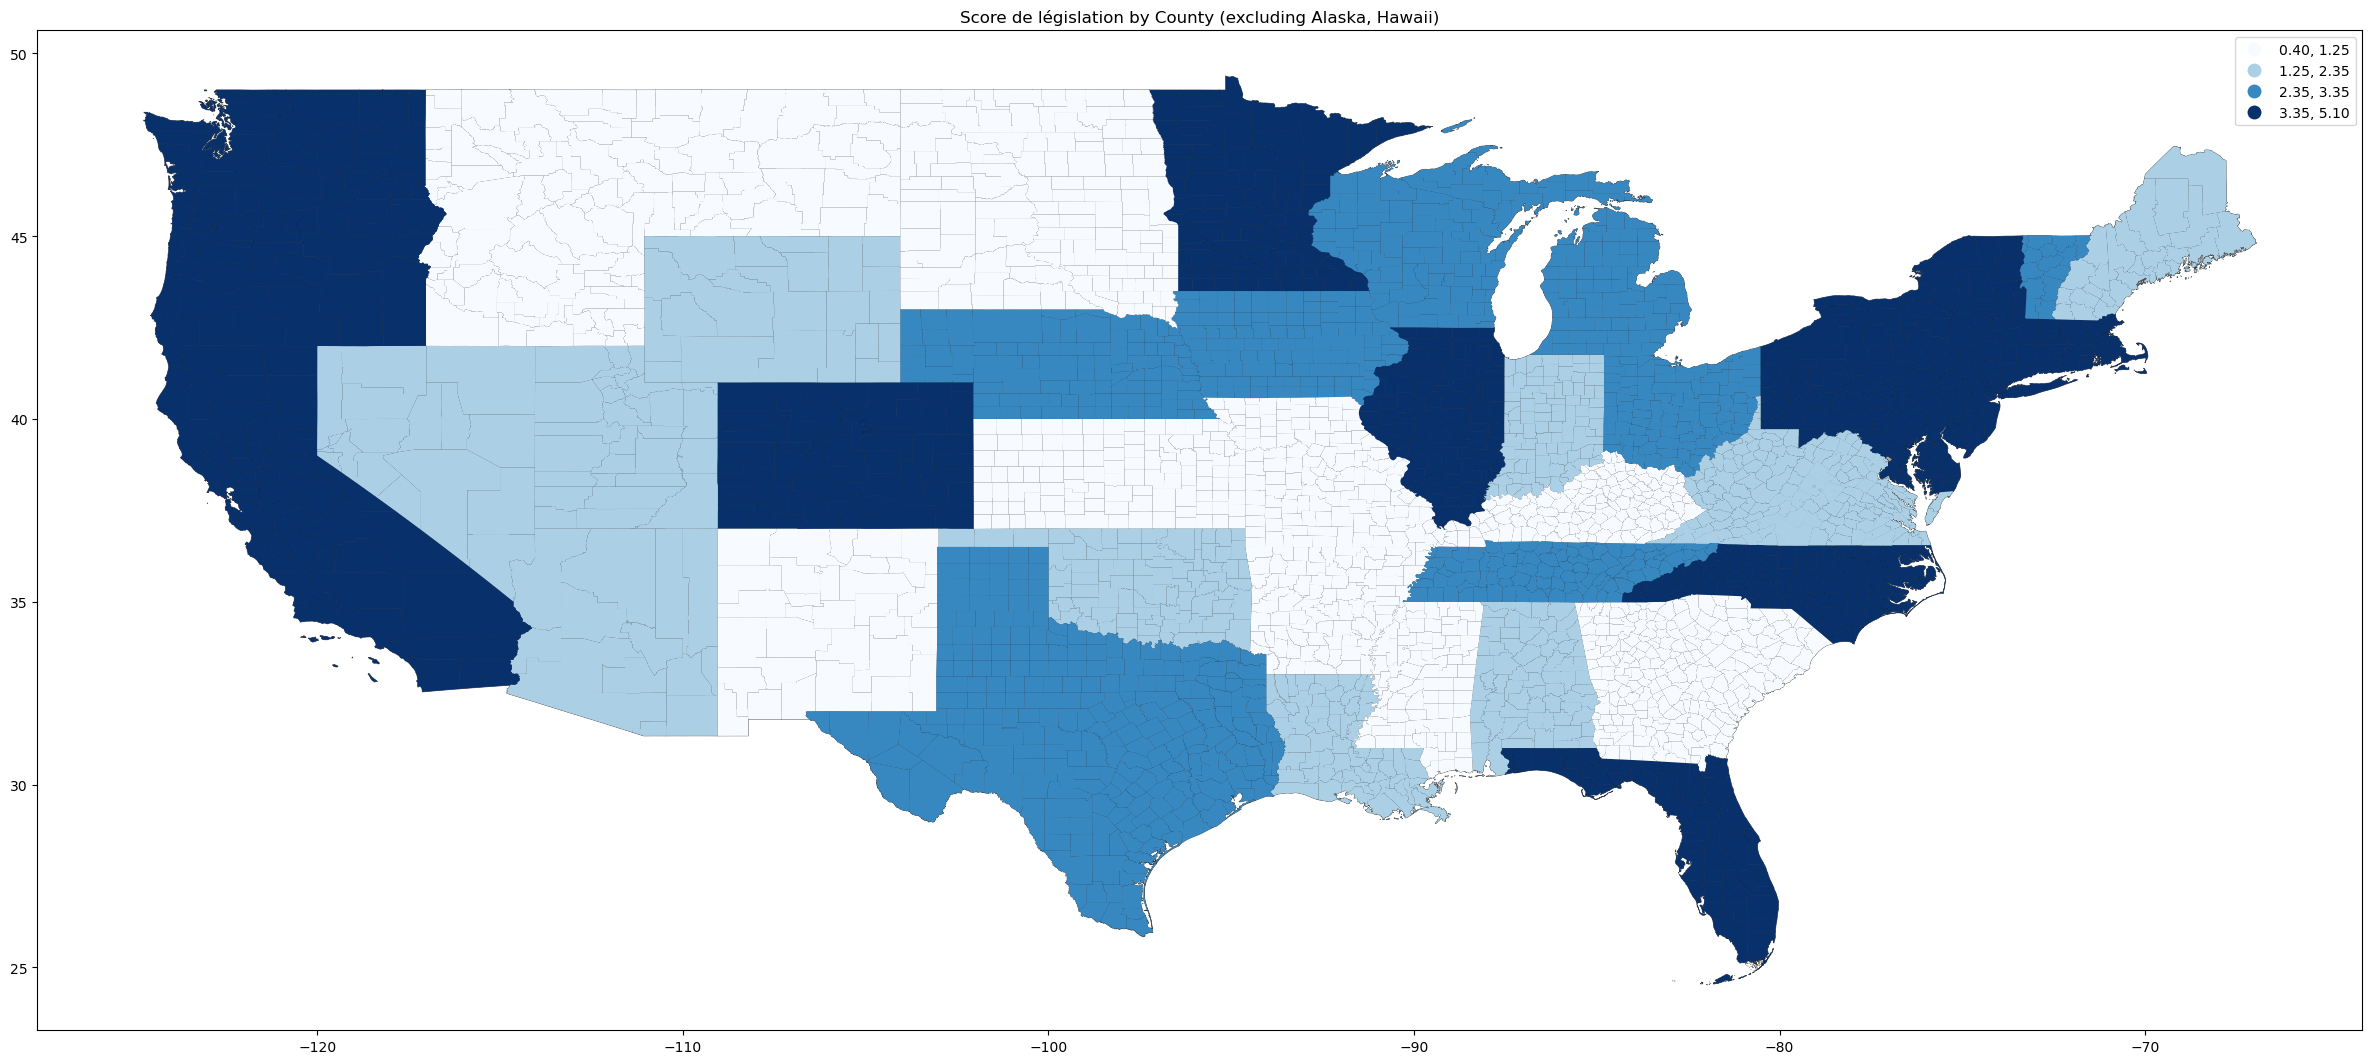

In [20]:
# Base map plot
ax = total_db_geo.plot(
    color='gray',
    markersize=1,
    alpha=0.7,
    figsize=(30, 30),
    edgecolor='black',
    linewidth=0.5
)

# Additional data points plot using incident density
incident_density_geo.plot(ax=ax, aspect = 1, figsize = (10,6), column = "score_legis", legend = True, cmap = "Blues", 
scheme = "Quantiles", k = 4)

# Title and show plot
plt.title("Score de législation by County (excluding Alaska, Hawaii)")
plt.show()

### Tentative de visualisation de corrélations 

In [21]:
df_total_nb = merge_geo.merge(agg_incident_county, on='id_county', how='left')

In [22]:
df_total_nb

Unnamed: 0_left  incident_id        date         state  \
0                100178       461105  2013-01-01  Pennsylvania   
1                104811       481268  2013-10-21  Pennsylvania   
2                   678        94128  2014-01-08  Pennsylvania   
3                   801        94504  2014-01-08  Pennsylvania   
4                  1324        95999  2014-01-10  Pennsylvania   
...                 ...          ...         ...           ...   
264528           236232      1067804  2018-03-11    New Mexico   
264529           236296      1068059  2018-03-12     Louisiana   
264530           237582      1073662  2018-03-19      Nebraska   
264531           237471      1073166  2018-03-19      Missouri   
264532           238698      1078436  2018-03-24         Idaho   

               city_or_county                                    address  \
0                  Mckeesport  1506 Versailles Avenue and Coursin Street   
1       Pittsburgh (Homewood)                 7200 block of Kelly Street   
2                   Homestead           Steak ‘n Shake at The Waterfront   
3                     Munhall                Waterfront Shopping Complex   
4                  Pittsburgh                 2000 block of Fifth Avenue   
...                       ...                                        ...   
264528            Fort Sumner                                        NaN   
264529        Lake Providence                                        NaN   
264530                 Aurora                                 300 W L St   
264531            Pattonsburg                       US-69 and State Rd N   
264532                Challis                                        NaN   

        n_killed  n_injured  \
0              0          4   
1              2          5   
2              1          0   
3              1          0   
4              0          1   
...          ...        ...   
264528         1          1   
264529         1          0   
264530         0          0   
264531         0          1   
264532         1          0   

                                             incident_url  \
0       http://www.gunviolencearchive.org/incident/461105   
1       http://www.gunviolencearchive.org/incident/481268   
2        http://www.gunviolencearchive.org/incident/94128   
3        http://www.gunviolencearchive.org/incident/94504   
4        http://www.gunviolencearchive.org/incident/95999   
...                                                   ...   
264528  http://www.gunviolencearchive.org/incident/106...   
264529  http://www.gunviolencearchive.org/incident/106...   
264530  http://www.gunviolencearchive.org/incident/107...   
264531  http://www.gunviolencearchive.org/incident/107...   
264532  http://www.gunviolencearchive.org/incident/107...   

                                               source_url  \
0       http://www.post-gazette.com/local/south/2013/0...   
1       http://www.wtae.com/news/local/allegheny/two-p...   
2       http://pittsburgh.cbslocal.com/2014/01/22/u-s-...   
3       http://www.post-gazette.com/local/south/2014/0...   
4       /pittsburgh.cbslocal.com/2014/01/11/man-wounde...   
...                                                   ...   
264528  http://www.krqe.com/news/crime/police-search-f...   
264529  https://www.thenewsstar.com/story/news/crime/2...   
264530  http://www.theindependent.com/communities/auro...   
264531  http://www.kctv5.com/story/37769911/2-charged-...   
264532  http://www.localnews8.com/news/crime-tracker/7...   

        incident_url_fields_missing  congressional_district      gun_stolen  \
0                             False                    14.0             NaN   
1                             False                    14.0             NaN   
2                             False                    14.0             NaN   
3                             False                    14.0             NaN   
4                             False                    14.0         

In [23]:
small_df=df_total_nb[["med_h_income_year_2015","young_sus", "unemp_rate_year_2015", "bchecks_2015", "incident_count_by_county", "per_dem", "score_legis"]]

In [24]:
small_df=df_total_nb.groupby('id_county').agg({
    'med_h_income_year_2015': 'first',
    'bchecks_2015':'first',
    'bchecks_2018':'first',
    'incident_count_by_county':'first',
    'per_dem': 'first',
    'per_gop':'first',
    'score_legis': 'first',
    'incident_density':'first',
    'resident_pop_year_2015':'first',
    'unemp_rate_year_2015':'first',
    'bachelors_deg_year_2015':'first'
})

In [25]:
import seaborn as sns

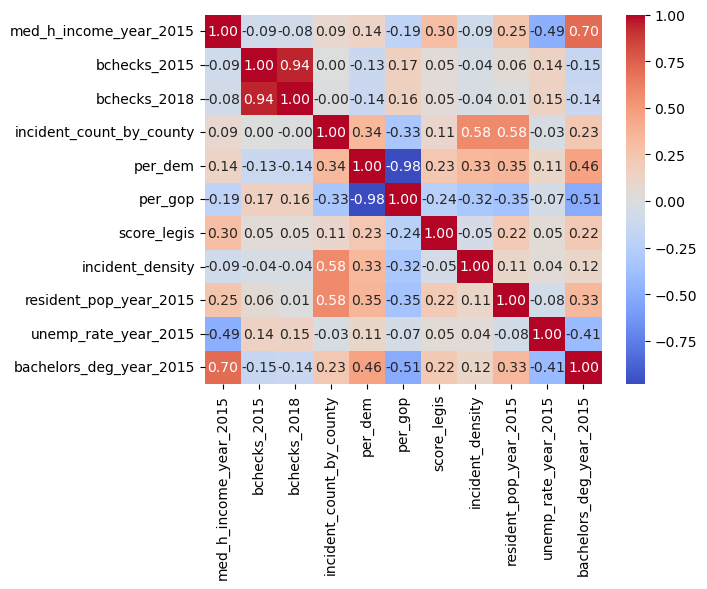

In [26]:
g1 = sns.heatmap(small_df.corr(), cmap='coolwarm', annot=True, fmt=".2f")

Text(0.5, 1.0, "Nombre d'incident par tête en fonction de la population du comté")

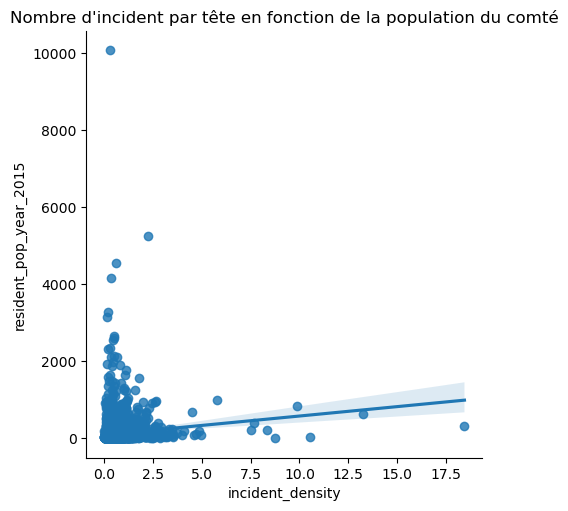

In [27]:
sns.lmplot(x="incident_density", y='resident_pop_year_2015', data=small_df)
plt.title("Nombre d'incident par tête en fonction de la population du comté")

In [28]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram,linkage

In [29]:
X = small_df.drop(['incident_density', 'incident_count_by_county'], axis=1)
X=X[pd.notna(X['med_h_income_year_2015' ])]
X=X[pd.notna(X['score_legis' ])]
X

med_h_income_year_2015  bchecks_2015  bchecks_2018   per_dem  \
id_county                                                                 
204                       36201.0        654192        694101  0.233154   
205                       38412.0        654192        694101  0.224814   
206                       43452.0        654192        694101  0.185979   
207                       38474.0        654192        694101  0.241738   
208                       38771.0        654192        694101  0.195324   
...                           ...           ...           ...       ...   
30525                     83290.0         62339         60150  0.600608   
30526                     62968.0         62339         60150  0.149261   
30527                     56088.0         62339         60150  0.143203   
32077                     86548.0        454062        524770  0.523004   
32078                     43687.0       1147082       1203145  0.636584   

            per_gop  score_legis  resident_pop_year_2015  \
id_county                                                  
204        0.745808         3.35                  16.224   
205        0.748185         3.35                  27.986   
206        0.789072         3.35                  17.130   
207        0.738396         3.35                  14.588   
208        0.782172         3.35                  11.596   
...             ...          ...                     ...   
30525      0.321945         1.40                  23.083   
30526      0.764187         1.40                  20.777   
30527      0.783580         1.40                   8.282   
32077      0.382197         3.50                  64.914   
32078      0.340938         3.75                2659.549   

           unemp_rate_year_2015  bachelors_deg_year_2015  
id_county                                                 
204                         6.8                     10.8  
205                         6.9                     14.2  
206                         4.7                     15.7  
207                         5.6                     13.0  
208                         6.7                     12.7  
...                         ...                      ...  
30525                       4.0                     53.9  
30526                       5.3                     19.3  
30527                       4.2                     21.1  
32077                       2.7                     51.9  
32078                       5.5                     26.9  

[2790 rows x 9 columns]

In [30]:
df_total_nb.loc[df_total_nb['id_county']==33923]

Unnamed: 0_left  incident_id        date     state  \
254791            89822       420172  2014-05-10  Virginia   
254792            30245       180847  2014-08-16  Virginia   
254793            29652       179371  2014-08-19  Virginia   
254794            30921       182724  2014-08-28  Virginia   
254795            39527       206627  2014-10-16  Virginia   
254796            53656       283324  2015-01-24  Virginia   
254797            72131       354072  2015-06-05  Virginia   
254798            85114       404298  2015-07-29  Virginia   
254799            90827       424305  2015-09-30  Virginia   
254800            91234       425771  2015-10-03  Virginia   
254801            92767       431781  2015-10-09  Virginia   
254802           100827       464084  2015-12-08  Virginia   
254803           121906       552144  2016-05-02  Virginia   
254804           135983       616418  2016-07-24  Virginia   
254805           137173       621969  2016-08-04  Virginia   
254806           143529       651249  2016-08-28  Virginia   
254807           152873       692366  2016-11-03  Virginia   
254808           163689       743315  2017-01-04  Virginia   
254809           168850       768407  2017-02-05  Virginia   
254810           173617       788948  2017-03-06  Virginia   
254811           195917       885187  2017-07-03  Virginia   
254812           214660       973134  2017-10-19  Virginia   
254813           213888       965418  2017-10-20  Virginia   
254814           227693      1028804  2017-12-25  Virginia   

                     city_or_county                               address  \
254791                       Verona                         41 Midvale Dr   
254792                Fort Defiance      2000 block of Knightly Mill Road   
254793                       Verona          100 block of Oak Crest Drive   
254794                 Mount Sidney                        Gray Fox Road    
254795                 Fishersville                                  I 64   
254796                 Fishersville                339 Westminister Drive   
254797                 Fishersville                         189 Hornet Rd   
254798                  Weyers Cave                    77 Aviation Circle   
254799                Stuarts Draft   2300 block of Stuarts Draft Highway   
254800                   Waynesboro           500 block of Woodside Drive   
254801                Stuarts Draft                           Rankin Lane   
254802                     Staunton                    48 Rocky Hill Lane   
254803                 Fishersville                          Bolton Place   
254804                     Staunton        700 block of Chestnut Ridge Rd   
254805  Steeles Tavern (Spottswood)         100 block of Carson Mill Road   
254806                   Waynesboro                     59 Sandy Ridge Rd   
254807                     Grottoes           100 block of Strickley Road   
254808                       Verona                        37 Theresa Cir   
254809                 Mount Sidney                                  I-81   
254810                     Staunton  Desper Hollow Road and Jefferson Hwy   
254811                Stuarts Draft                 700 block of Wilda Rd   
254812                  Churchville         3800 block of Churchville Ave   
254813                      Crimora             400 block of Thorofare Rd   
254814                      Crimora                      Forest Chapel Ln   

        n_killed  n_injured  \
254791         0          0   
254792         1          0   
254793         2          0   
254794         1          0   
254795         1          0   
254796         2          0   
254797         0          0   
254798         0          0   
254799         2          0   
254800         0          0   
254801         0          0   
254802         0          1   
254803         0          0   
254804         0          0   
254805         0          1   
254806         0          0   
2548

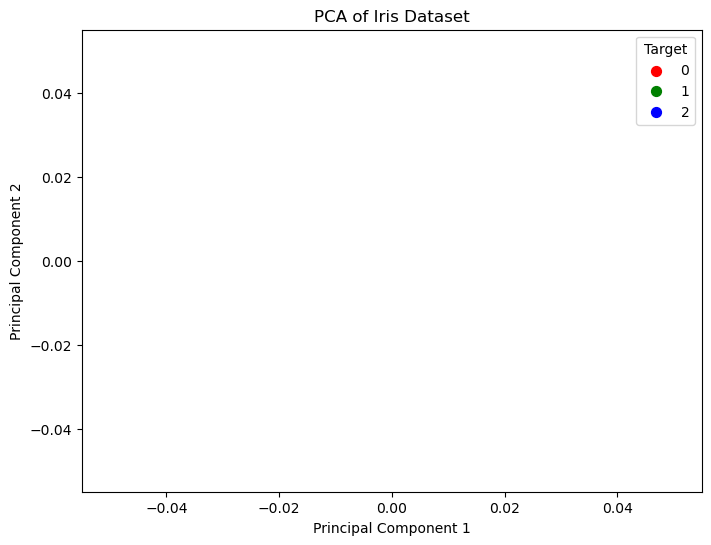

In [31]:

# Step 2: Load or prepare your data
X = small_df.drop(['incident_density', 'incident_count_by_county'], axis=1)
X=X[pd.notna(X['med_h_income_year_2015' ])]
X=X[pd.notna(X['score_legis' ])]
X
y = small_df['incident_density']

# Step 3: Create an instance of the PCA class
pca = PCA(n_components=2)  # Specify the number of components you want to keep

# Step 4: Fit the PCA model to your data
X_pca = pca.fit_transform(X)

# Step 5: Access the components and transformed data
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

# Visualize the transformed data
df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df['Target'] = y

# Plot the transformed data
plt.figure(figsize=(8, 6))
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices_to_keep = df['Target'] == target
    plt.scatter(df.loc[indices_to_keep, 'Principal Component 1'],
                df.loc[indices_to_keep, 'Principal Component 2'],
                c=color,
                s=50)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(targets, title='Target')
plt.title('PCA of Iris Dataset')
plt.show()

In [32]:
pca = prince.PCA(
     n_components=10,
     n_iter=3,
     rescale_with_mean=True,
     rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42 )
pca = pca.fit(small_df)

NameError: name 'prince' is not defined

Text(0, 0.5, 'per_dem')

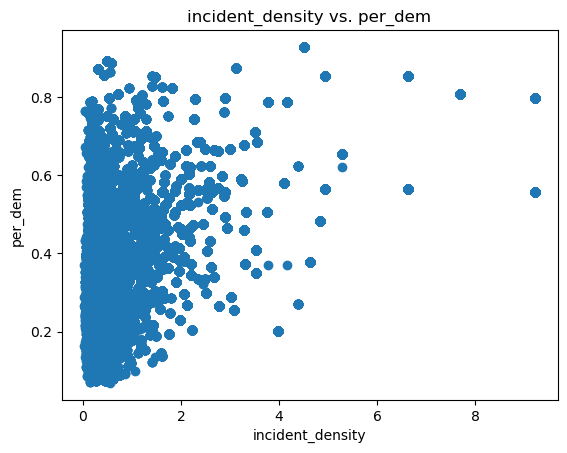

In [ ]:
plt.scatter(df_total_nb['incident_density'], df_total_nb['per_dem'])
plt.title('incident_density vs. per_dem')
plt.xlabel('incident_density')
plt.ylabel('per_dem')

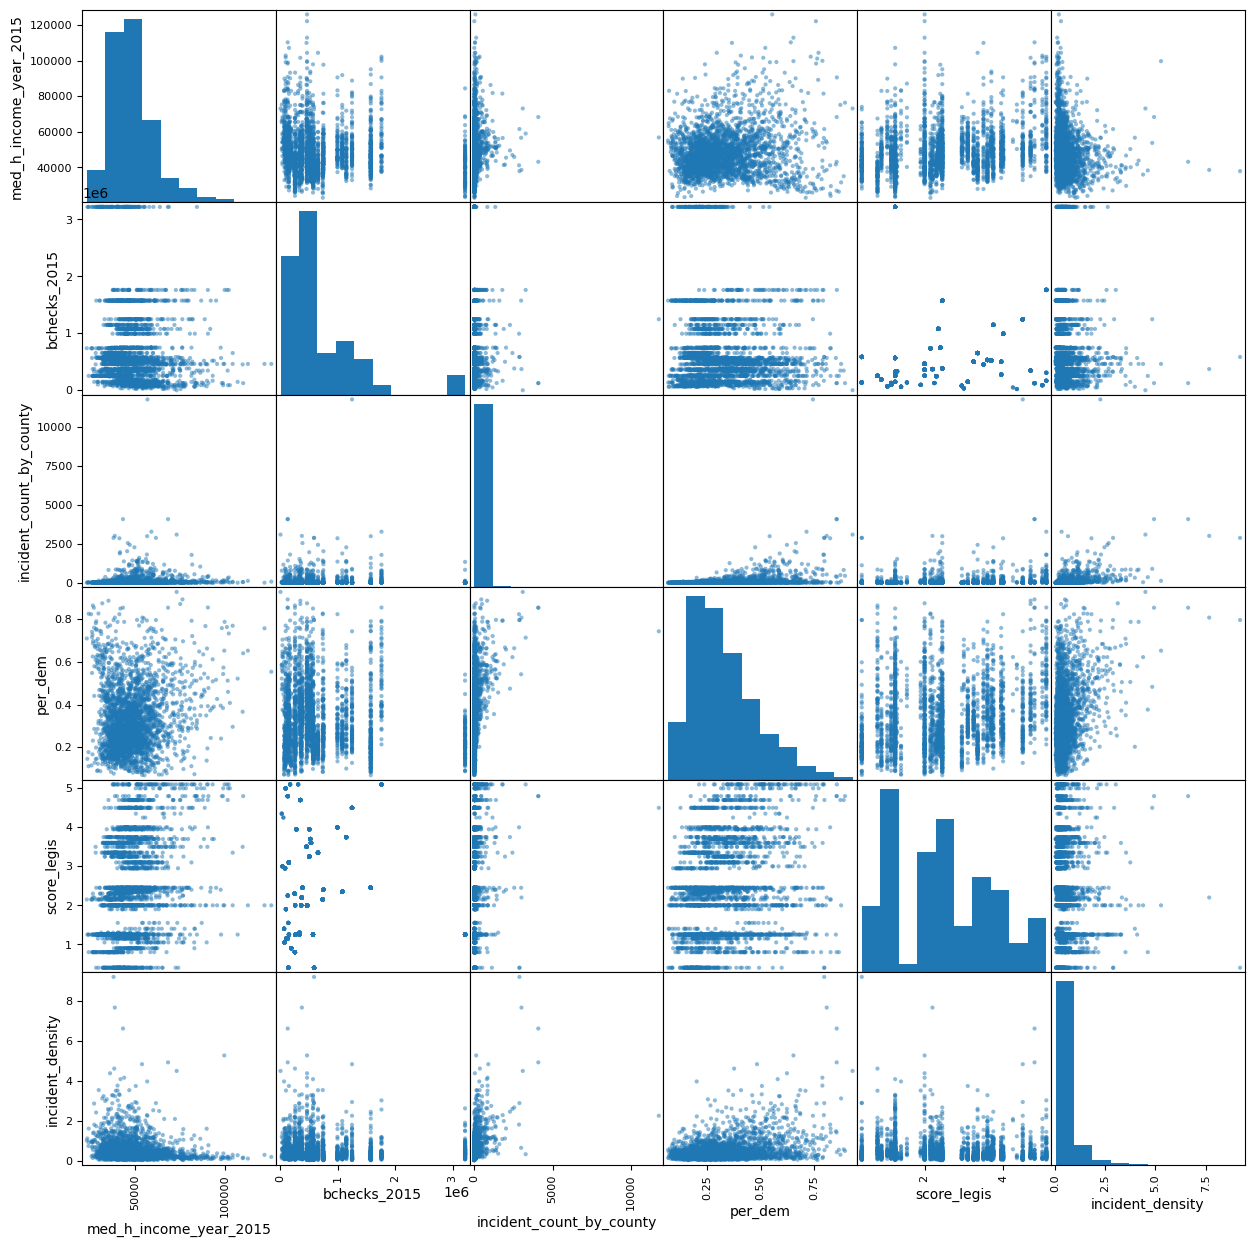

In [ ]:
ax = pd.plotting.scatter_matrix(small_df, figsize = (15,15))

ESSAI DE TRUC AU PROPRE

In [33]:
df_total_nb.head()

Unnamed: 0_left  incident_id        date         state  \
0           100178       461105  2013-01-01  Pennsylvania   
1           104811       481268  2013-10-21  Pennsylvania   
2              678        94128  2014-01-08  Pennsylvania   
3              801        94504  2014-01-08  Pennsylvania   
4             1324        95999  2014-01-10  Pennsylvania   

          city_or_county                                    address  n_killed  \
0             Mckeesport  1506 Versailles Avenue and Coursin Street         0   
1  Pittsburgh (Homewood)                 7200 block of Kelly Street         2   
2              Homestead           Steak ‘n Shake at The Waterfront         1   
3                Munhall                Waterfront Shopping Complex         1   
4             Pittsburgh                 2000 block of Fifth Avenue         0   

   n_injured                                       incident_url  \
0          4  http://www.gunviolencearchive.org/incident/461105   
1          5  http://www.gunviolencearchive.org/incident/481268   
2          0   http://www.gunviolencearchive.org/incident/94128   
3          0   http://www.gunviolencearchive.org/incident/94504   
4          1   http://www.gunviolencearchive.org/incident/95999   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.wtae.com/news/local/allegheny/two-p...   
2  http://pittsburgh.cbslocal.com/2014/01/22/u-s-...   
3  http://www.post-gazette.com/local/south/2014/0...   
4  /pittsburgh.cbslocal.com/2014/01/11/man-wounde...   

   incident_url_fields_missing  congressional_district gun_stolen gun_type  \
0                        False                    14.0        NaN      NaN   
1                        False                    14.0        NaN      NaN   
2                        False                    14.0        NaN      NaN   
3                        False                    14.0        NaN      NaN   
4                        False                    14.0        NaN      NaN   

                            incident_characteristics  latitude  \
0  ['Shot - Wounded/Injured', 'Mass Shooting (4+ ...   40.3467   
1  ['Shot - Wounded/Injured', 'Shot - Dead (murde...   40.4555   
2  ['Shot - Dead (murder, accidental, suicide)', ...   40.4059   
3  ['Shot - Dead (murder, accidental, suicide)', ...   40.3923   
4                                                NaN   40.4380   

   location_description  longitude  n_guns_involved  \
0                   NaN   -79.8559              NaN   
1  Diverse Banquet Hall   -79.8970              NaN   
2                   NaN   -79.9120              NaN   
3                   NaN   -79.9000              NaN   
4                   NaN   -79.9775              NaN   

                                               notes  \
0  Julian Sims under investigation: Four Shot and...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

               participant_age  \
0                    {0: '20'}   
1           {0: '21', 1: '27'}   
2  {0: '20', 1: '20', 2: '17'}   
3           {0: '20', 1: '17'}   
4                          NaN   

                               participant_age_group  \
0  {0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...   
1  {0: 'Adult 18+', 1: 'Adult 18+', 2: 'Adult 18+...   
2  {0: 'Adult 18+', 1: 'Adult 18+', 2: 'Teen 12-17'}   
3                  {0: 'Adult 18+', 1: 'Teen 12-17'}   
4                                   {0: 'Adult 18+'}   

                                  participant_gender  \
0     {0: 'Male', 1: 'Male', 3: 'Male', 4: 'Female'}   
1  {0: 'Female', 1: 'Male', 2: 'Female', 3: 'Fema...   
2                  {0: 'Male', 1: 'Male', 2: 'Male'}   
3                             {0: 'Male', 1: 'Male'}   
4                                        {0: 'Male'} 

In [34]:
df_total= gpd.GeoDataFrame(df_total_nb, geometry='polygon_geometry')

Création d'une nouvelle colonne comprenant l'aire du comté

In [35]:
df_total= df_total.to_crs(crs=32618)

In [36]:
df_total["area_county"] = df_total['polygon_geometry'].area/ 10**6 #obtenir l'aire en km²

In [37]:
df_total = df_total.sort_values('incident_id')

In [44]:
df_total.head(5)
#après vérification de quelques comtés pris au hasard dans la base, on se rend compte que les aires ne sont pas parfaites, mais elles sont relativement proches des valeurs réelles

Unnamed: 0_left  incident_id        date     state city_or_county  \
77542                 0        92114  2014-01-01  Kentucky      Lexington   
165131                1        92117  2014-01-01  Kentucky      Cynthiana   
151657                2        92119  2014-01-01  Kentucky     Louisville   
152998                3        92122  2014-01-01  Virginia   Falls Church   
153198                4        92125  2014-01-01  Oklahoma         Lawton   

                               address  n_killed  n_injured  \
77542   Sixth Street and Elm Tree Lane         0          1   
165131                             NaN         0          1   
151657               38th and Broadway         0          1   
152998         North Washington Street         0          0   
153198            Sheridan and Pollard         0          0   

                                            incident_url  \
77542   http://www.gunviolencearchive.org/incident/92114   
165131  http://www.gunviolencearchive.org/incident/92117   
151657  http://www.gunviolencearchive.org/incident/92119   
152998  http://www.gunviolencearchive.org/incident/92122   
153198  http://www.gunviolencearchive.org/incident/92125   

                                               source_url  \
77542   http://www.lex18.com/news/lexington-police-sta...   
165131  https://www.wtvq.com/2014/01/01/harrison-sheri...   
151657  http://www.whas11.com/news/local/Person-injure...   
152998  http://www.nbcwashington.com/news/local/Two-So...   
153198  http://www.kswo.com/story/24342150/lpd-investi...   

        incident_url_fields_missing  congressional_district      gun_stolen  \
77542                         False                     6.0             NaN   
165131                        False                     4.0  {0: 'Unknown'}   
151657                        False                     3.0             NaN   
152998                        False                     8.0             NaN   
153198                        False                     4.0             NaN   

              gun_type                           incident_characteristics  \
77542              NaN                                                NaN   
165131  {0: 'Unknown'}  ['Shot - Wounded/Injured', 'Accidental Shootin...   
151657             NaN                                                NaN   
152998             NaN                                                NaN   
153198             NaN                                                NaN   

        latitude location_description  longitude  n_guns_involved  \
77542    38.0507                  NaN   -84.4829              NaN   
165131   38.4333                  NaN   -84.3542              1.0   
151657   38.2501                  NaN   -85.8150              NaN   
152998   38.8847                  NaN   -77.1672              NaN   
153198   34.6347                  NaN   -98.4222              NaN   

                          notes participant_age  \
77542                       NaN             NaN   
165131  US-62 east of Cynthiana       {1: '22'}   
151657                      NaN             NaN   
152998                      NaN             NaN   
153198                      NaN             NaN   

                   participant_age_group      participant_gender  \
77542                   {0: 'Adult 18+'}             {0: 'Male'}   
165131  {0: 'Adult 18+', 1: 'Adult 18+'}  {0: 'Male', 1: 'Male'}   
151657                  {0: 'Adult 18+'}             {0: 'Male'}   
152998                               NaN                     NaN   
153198                  {0: 'Adult 18+'}  {0: 'Male', 1: 'Male'}   

                            participant_name participant_relationship  \
77542                                    NaN                      NaN   
165131  0::Dustin Mullins||1::Timothy Turner           {1: 'Friends'}   
151657                                   NaN                      NaN   
152998                                   NaN                      NaN   
1531

In [45]:
df_pop_density=df_total.groupby('id_county').agg({'area_county': 'first', 'resident_pop_year_2015': 'first'}).reset_index()
df_pop_density["density_pop"]=df_pop_density['resident_pop_year_2015']/df_pop_density['area_county']

In [47]:
df_pop_density=df_pop_density[['id_county', 'density_pop']]

id_county  density_pop
0           204     0.013886
1           205     0.017383
2           206     0.022295
3           207     0.020377
4           208     0.012545
...         ...          ...
2812      33923          NaN
2813      33925          NaN
2814      33927          NaN
2815      33929          NaN
2816      33931          NaN

[2817 rows x 2 columns]

In [48]:
df_total=df_total.merge(df_pop_density, on='id_county')

In [49]:
df_total

Unnamed: 0_left  incident_id        date      state  \
0                     0        92114  2014-01-01   Kentucky   
1                    25        92183  2014-01-01   Kentucky   
2                   116        92439  2014-01-02   Kentucky   
3                   231        92778  2014-01-03   Kentucky   
4                   383        93238  2014-01-04   Kentucky   
...                 ...          ...         ...        ...   
264528           236296      1068059  2018-03-12  Louisiana   
264529           237471      1073166  2018-03-19   Missouri   
264530           237582      1073662  2018-03-19   Nebraska   
264531           238698      1078436  2018-03-24      Idaho   
264532           239226      1080683  2016-06-01     Kansas   

           city_or_county                         address  n_killed  \
0               Lexington  Sixth Street and Elm Tree Lane         0   
1               Lexington                    Maple Avenue         0   
2               Lexington                    Eddie Street         0   
3               Lexington  Chestnut Street and East Fifth         0   
4               Lexington               Summerville Drive         1   
...                   ...                             ...       ...   
264528    Lake Providence                             NaN         1   
264529        Pattonsburg            US-69 and State Rd N         0   
264530             Aurora                      300 W L St         0   
264531            Challis                             NaN         1   
264532  Hamilton (county)                             NaN         0   

        n_injured                                       incident_url  \
0               1   http://www.gunviolencearchive.org/incident/92114   
1               1   http://www.gunviolencearchive.org/incident/92183   
2               1   http://www.gunviolencearchive.org/incident/92439   
3               2   http://www.gunviolencearchive.org/incident/92778   
4               0   http://www.gunviolencearchive.org/incident/93238   
...           ...                                                ...   
264528          0  http://www.gunviolencearchive.org/incident/106...   
264529          1  http://www.gunviolencearchive.org/incident/107...   
264530          0  http://www.gunviolencearchive.org/incident/107...   
264531          0  http://www.gunviolencearchive.org/incident/107...   
264532          0  http://www.gunviolencearchive.org/incident/108...   

                                               source_url  \
0       http://www.lex18.com/news/lexington-police-sta...   
1       http://www.wkyt.com/home/headlines/Man-shot-on...   
2       http://www.wkyt.com/home/headlines/238546091.html   
3       http://www.lex18.com/news/lex-18-crime-stopper...   
4       http://www.wkyt.com/home/headlines/Police-Elde...   
...                                                   ...   
264528  https://www.thenewsstar.com/story/news/crime/2...   
264529  http://www.kctv5.com/story/37769911/2-charged-...   
264530  http://www.theindependent.com/communities/auro...   
264531  http://www.localnews8.com/news/crime-tracker/7...   
264532  http://www.kansas.com/news/local/crime/article...   

        incident_url_fields_missing  congressional_district      gun_stolen  \
0                             False                     6.0             NaN   
1                             False                     6.0             NaN   
2                             False                     6.0             NaN   
3                             False                     6.0             NaN   
4                             False                     6.0             NaN   
...                             ...                     ...             ...   
264528                        False                     5.0  {0: 'Unknown'}   
264529                        False                     6.0  {0: 'Unknown'}   
264530                        False                     NaN  {0: 'Unknown'}   
264531    

In [53]:
small_df=df_total.groupby('id_county').agg({
    'med_h_income_year_2015': 'first',
    'bchecks_2015':'first',
    'bchecks_2018':'first',
    'incident_count_by_county':'first',
    'per_dem': 'first',
    'per_gop':'first',
    'score_legis': 'first',
    'incident_density':'first',
    'resident_pop_year_2015_y':'first',
    'unemp_rate_year_2015':'first',
    'bachelors_deg_year_2015':'first',
    'density_pop':'first'
    
})

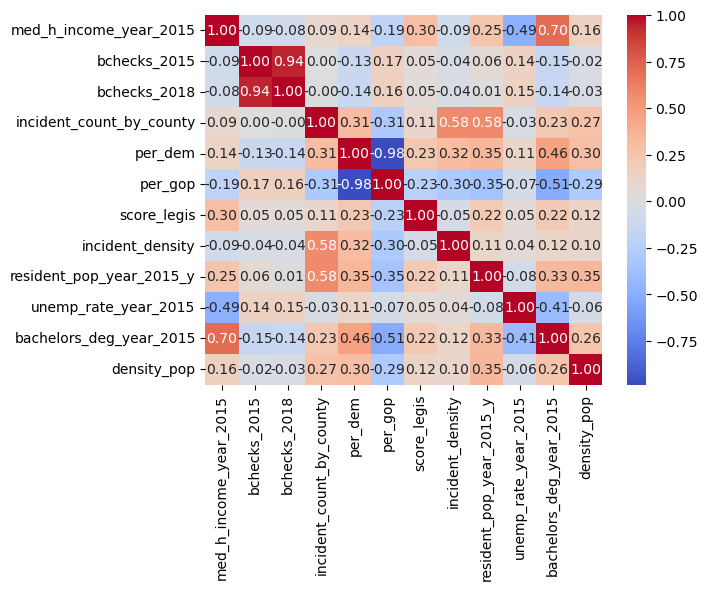

In [54]:
g1 = sns.heatmap(small_df.corr(), cmap='coolwarm', annot=True, fmt=".2f")

Text(0, 0.5, 'density_pop')

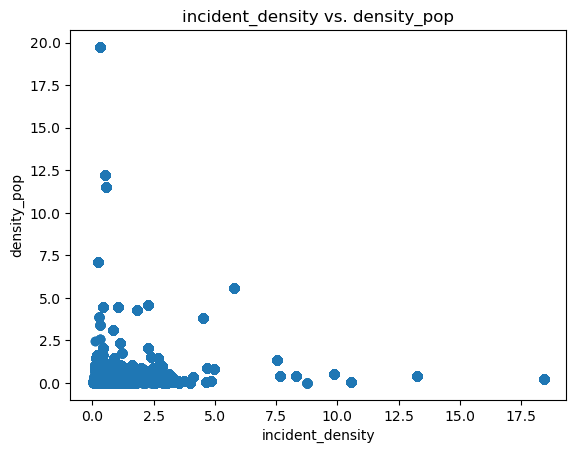

In [57]:
plt.scatter(df_total['incident_density'], df_total['density_pop'])
plt.title('incident_density vs. density_pop')
plt.xlabel('incident_density')
plt.ylabel('density_pop')